In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [2]:
N=51 # Number of discretizations in x
x, y, z = symbols('x y z', real=True)
init_printing(use_unicode=True)
f=x**4 + y**4 - 1

M =Matrix([x**4 + y**4 - 1])
J = M.jacobian([x,y])
ker = Matrix(J.nullspace())

#Evaluate kernel at various points
#Get expression in terms of y
fy = solve(f, x)
#Lambdify expression for eval
e = lambdify(y,fy,"numpy")
xe = np.linspace(-1, 1, N, dtype=float)
ye = e(xe)

# Get normal vectors eval equation
j = lambdify([x,y], J, "numpy")

# Get tangent vectors eval equation
t = lambdify([x,y], ker, "numpy")

ker


⎡  3 ⎤
⎢-y  ⎥
⎢────⎥
⎢  3 ⎥
⎢ x  ⎥
⎢    ⎥
⎣ 1  ⎦

In [3]:
norms = j(xe,ye[0])[0]
norms2 = j(xe,ye[1])[0]
tangents = t(xe,ye[0])
tangents2 = t(xe,ye[1])
#cast tangents constant values to same shape
tangents[1][0] = np.ones(tangents[0][0].shape)
tangents2[1][0] = np.ones(tangents[0][0].shape)
tang = np.array([tangents[0][0], tangents[1][0]])
tang = np.nan_to_num(tang, posinf=1000000, neginf=-1000000)
tang2 = np.array([tangents2[0][0], tangents2[1][0]])
tang2 = np.nan_to_num(tang2, posinf=1000000, neginf=-1000000)
tang=tang/np.linalg.norm(tang,axis=0)
tang2=tang2/np.linalg.norm(tang2,axis=0)
norms

<lambdifygenerated-3>:2: RuntimeWarning: divide by zero encountered in true_divide
  return array([[-y**3/x**3], [1]])
<lambdifygenerated-3>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array([[-y**3/x**3], [1]])


array([[-4.00000000e+00, -3.53894400e+00, -3.11475200e+00,
        -2.72588800e+00, -2.37081600e+00, -2.04800000e+00,
        -1.75590400e+00, -1.49299200e+00, -1.25772800e+00,
        -1.04857600e+00, -8.64000000e-01, -7.02464000e-01,
        -5.62432000e-01, -4.42368000e-01, -3.40736000e-01,
        -2.56000000e-01, -1.86624000e-01, -1.31072000e-01,
        -8.78080000e-02, -5.52960000e-02, -3.20000000e-02,
        -1.63840000e-02, -6.91200000e-03, -2.04800000e-03,
        -2.56000000e-04,  0.00000000e+00,  2.56000000e-04,
         2.04800000e-03,  6.91200000e-03,  1.63840000e-02,
         3.20000000e-02,  5.52960000e-02,  8.78080000e-02,
         1.31072000e-01,  1.86624000e-01,  2.56000000e-01,
         3.40736000e-01,  4.42368000e-01,  5.62432000e-01,
         7.02464000e-01,  8.64000000e-01,  1.04857600e+00,
         1.25772800e+00,  1.49299200e+00,  1.75590400e+00,
         2.04800000e+00,  2.37081600e+00,  2.72588800e+00,
         3.11475200e+00,  3.53894400e+00,  4.00000000e+0

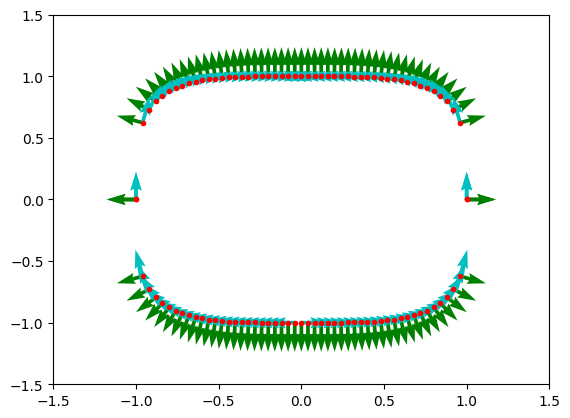

In [4]:

plt.figure(0)
plt.plot(xe,ye[0], 'r.')
plt.plot(xe,ye[1], 'r.')
plt.quiver(xe,ye[0], norms[0], norms[1], color='g', angles='uv')
plt.quiver(xe,ye[1], norms2[0], norms2[1], color='g', angles='uv')
z=np.zeros(xe.shape)

plt.quiver(xe,ye[0], tang[0,:], tang[1,:], color='c',  angles='uv')
plt.quiver(xe,ye[1], tang2[0,:], tang2[1,:], color='c',  angles='uv')
# , scale_units='xy', units='width')
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.show()

